# Método de Cauchy

In [127]:
using Distributions, StatsPlots, Plots, StatsBase, LinearAlgebra

In [128]:
function CauchyTradicional(x0,y0,N)
    xk = zeros(N)
    yk = zeros(N)
    xk[1] = x0
    yk[1] = y0

    for k = 1:N-1
        dk = -grad(xk[k],yk[k])
        tk = -grad(xk[k],yk[k])'*dk/(dk'*D*dk)*0.5
        xk[k+1] = xk[k] + tk*dk[1]
        yk[k+1] = yk[k] + tk*dk[2]
    end
    return hcat(xk,yk)
end

function CauchyAdaptado(x0,y0,N)
    xk = zeros(N)
    yk = zeros(N)
    xk[1] = x0
    yk[1] = y0

    for k = 1:N-1
        ang = rand(Uniform(0,pi/6))
        R = [cos(ang) -sin(ang)
        ;sin(ang) cos(ang)]
        dk = -grad(xk[k],yk[k])
        tk = -grad(xk[k],yk[k])'*dk/(dk'*D*dk)*0.5
        dktr = R*dk*tk
        xk[k+1] = xk[k] + dktr[1]
        yk[k+1] = yk[k] + dktr[2]
    end
    return hcat(xk,yk)
end

CauchyAdaptado (generic function with 1 method)

Visualizando os dois métodos para um problema quadrático 2x2. 
$$f(x) = x^T Dx \quad D = [5, 0; 0, 100] $$

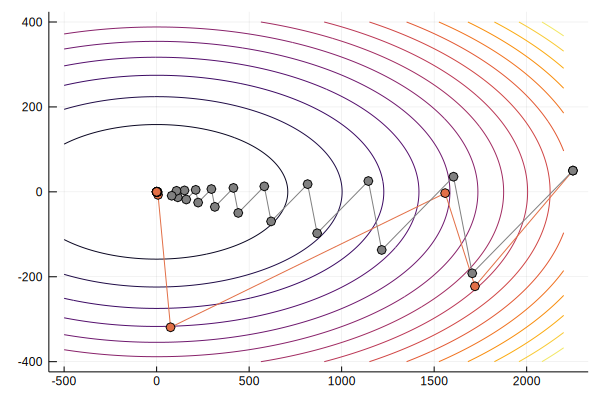

In [129]:
diag1 = 5
diag2 = 100

D = [diag1 0;
     0 diag2]
f(x,y) = [x,y]' * D * [x,y]
grad(x,y) = [2*diag1*x,2*diag2*y]

x0,y0 = 450,10
p_curva = contour(x, y, f, fill=false,legend=false)
z = 0
for i = 1:1
    x0,y0 = 450*5,10*5
    z  = CauchyAdapted(x0,y0,20)
    p_curva = plot!(z[:,1],z[:,2],legend=false,marker=:o, label="Cauchy Adaptado")
    z  = CauchyOpt(x0,y0,20)
    p_curva = plot!(z[:,1],z[:,2],legend=false,color=:gray,marker=:o,label="Cauchy Original")
end
p_curva

In [171]:
function CauchyTradicional3D(x0,y0,w0,N)
    xk = zeros(N)
    yk = zeros(N)
    wk = zeros(N)
    xk[1] = x0
    yk[1] = y0
    wk[1] = w0

    for k = 1:N-1
        dk = -grad(xk[k],yk[k],wk[k])
        tk = -grad(xk[k],yk[k],wk[k])'*dk/(dk'*D*dk)*0.5
        xk[k+1] = xk[k] + tk*dk[1]
        yk[k+1] = yk[k] + tk*dk[2]
        wk[k+1] = wk[k] + tk*dk[3]
    end
    return hcat(xk,yk,wk)
end

CauchyTradicional3D (generic function with 1 method)

In [ ]:
D = [diag1 0 0;
     0 diag2 0;
     0 0 diag3]
f(x,y,w) = [x,y,w]' * D * [x,y,w]
grad(x,y,w) = [2*diag1*x,2*diag2*y,2*diag3*w]

x0,y0,w0 = 450,10,40
x0,y0,w0 = 450*5.0,10*5.0, 40*5.0
z_padrao  = CauchyTradicional3D(x0,y0,w0,100)

In [130]:
diag1 = 5
diag2 = 100
diag3 = 100

D = [diag1 0 0;
     0 diag2 0;
     0 0 diag3]
f(x,y,w) = [x,y,w]' * D * [x,y,w]
grad(x,y,w) = [2*diag1*x,2*diag2*y,2*diag3*w]

grad (generic function with 2 methods)

In [167]:
function CauchyTradicional3D(x0,y0,w0,N)
    xk = zeros(N)
    yk = zeros(N)
    wk = zeros(N)
    xk[1] = x0
    yk[1] = y0
    wk[1] = w0

    for k = 1:N-1
        dk = -grad(xk[k],yk[k],wk[k])
        tk = -grad(xk[k],yk[k],wk[k])'*dk/(dk'*D*dk)*0.5
        xk[k+1] = xk[k] + tk*dk[1]
        yk[k+1] = yk[k] + tk*dk[2]
        wk[k+1] = wk[k] + tk*dk[3]
    end
    return hcat(xk,yk,wk)
end

function CauchyAdaptado3D(x0,y0,w0,N)
    xk = zeros(N)
    yk = zeros(N)
    wk = zeros(N)
    xk[1] = x0
    yk[1] = y0
    wk[1] = w0

    for k = 1:N-1
        ang = rand(Uniform(0,pi/6))
        Rx = [1 0 0 ;
              0 cos(ang) -sin(ang);
              0 sin(ang) cos(ang)]
        Ry = [cos(ang) 0 sin(ang) ;
              0 1 0;
              -sin(ang) 0 cos(ang)]
        Rw = [cos(ang) -sin(ang) 0 ;
              sin(ang) cos(ang) 0;
              0 0 1]
        dk = -grad(xk[k],yk[k],wk[k])
        tk = -grad(xk[k],yk[k],wk[k])'*dk/(dk'*D*dk)*0.5
        dktrx = Ry*dk*tk
        dktry = Rw*Rx*dk*tk
        dktrw = Rx*Ry*dk*tk
        xk[k+1] = xk[k] + dktrx[1]
        yk[k+1] = yk[k] + dktry[2]
        wk[k+1] = wk[k] + dktrw[2]
        println(dk,Rx*dk)
    end
    return hcat(xk,yk,wk)
end

CauchyAdaptado3D (generic function with 1 method)

In [168]:
diag1 = 5
diag2 = 100
diag3 = 100

D = [diag1 0 0;
     0 diag2 0;
     0 0 diag3]
f(x,y,w) = [x,y,w]' * D * [x,y,w]
grad(x,y,w) = [2*diag1*x,2*diag2*y,2*diag3*w]

x0,y0,w0 = 450,10,40
x0,y0,w0 = 450*5.0,10*5.0, 40*5.0
z_padrao  = CauchyTradicional3D(x0,y0,w0,100)
z_adaptado = CauchyAdaptado3D(x0,y0,w0,100);

[-22500.0, -10000.0, -40000.0][-22500.0, 523.712, -41227.7]
[-20457.1, -3315.38, -38370.8][-20457.1, 15936.4, -35061.9]
[-18140.2, -8182.92, -49232.3][-18140.2, 6082.67, -49535.6]
[-16378.4, -8971.28, -53799.4][-16378.4, 11708.8, -53270.6]
[-14466.4, -14145.2, -62477.7][-14466.4, 13409.6, -62639.7]
[-12402.6, -20531.4, -71313.5][-12402.6, -12260.8, -73190.4]
[-11352.6, -6575.35, -58507.5][-11352.6, 2505.71, -58822.5]
[-10305.9, -7330.06, -60712.3][-10305.9, 4761.55, -60967.6]
[-9173.57, -10041.4, -64952.3][-9173.57, 16439.9, -63634.6]
[-7437.49, -21731.1, -78110.5][-7437.49, 17783.9, -79102.6]
[-5245.81, -33982.0, -89936.3][-5245.81, -12076.7, -95380.6]
[-3938.63, -20978.4, -76959.9][-3938.63, -2121.23, -79739.7]
[-2831.85, -17976.3, -74089.1][-2831.85, -12444.8, -75216.2]
[-2415.99, -5339.54, -61597.4][-2415.99, 23084.8, -57357.1]
[-913.694, -24866.6, -81208.5][-913.694, -18642.3, -82859.1]
[-560.464, -6206.53, -62541.2][-560.464, 5990.75, -62562.2]
[71.0983, -11976.6, -68283.9][71.09

In [169]:
zp = zeros(100)
za = zeros(100)
for i = 1:100 
    zp[i] = norm(z_padrao[i,:])
    za[i] = norm(z_adaptado[i,:])
end

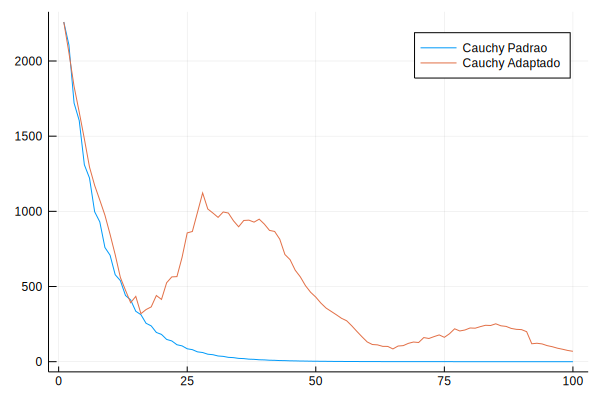

In [170]:
plot(zp,label="Cauchy Padrao")
plot!(za,label="Cauchy Adaptado")

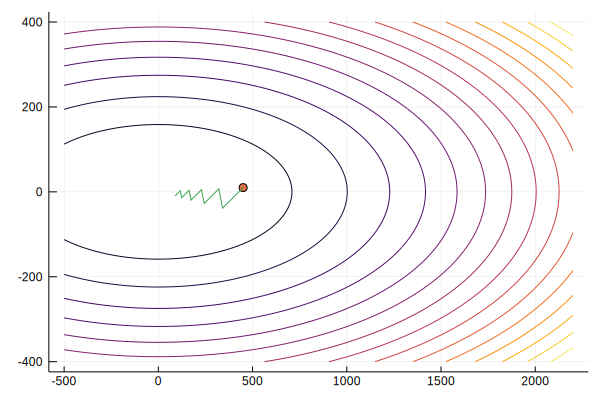

In [27]:
diag1 = 5
diag2 = 100

D = [diag1 0;
     0 diag2]
f(x,y) = [x,y]' * D * [x,y]
grad(x,y) = [2*diag1*x,2*diag2*y]

x,y = 1,1
x0,y0 = 450,10
f(x,y)

N = 10
xk = zeros(N)
yk = zeros(N)
xk[1] = x0
yk[1] = y0

for k = 1:N-1
    dk = -grad(xk[k],yk[k])
    tk = -grad(xk[k],yk[k])'*dk/(dk'*D*dk)*0.5
    xk[k+1] = xk[k] + tk*dk[1]
    yk[k+1] = yk[k] + tk*dk[2]
end

x = -500:1.0:2200
y = -400:1.0:400
X = repeat(reshape(x, 1, :), length(y), 1)
Y = repeat(y, 1, length(x))
Z = map(f, X, Y)
p1 = contour(x, y, f, fill=false,legend=false)
scatter!([x0],[y0])
plot!(xk,yk)

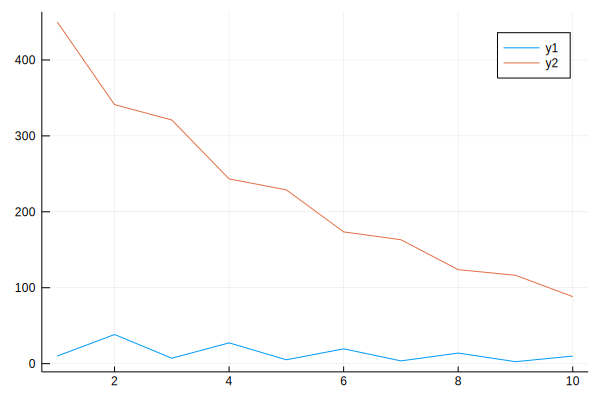

In [4]:
plot(abs.(yk))
plot!(abs.(xk))

In [5]:
function CauchyOpt(x0,y0,N)
    xk = zeros(N)
    yk = zeros(N)
    xk[1] = x0
    yk[1] = y0

    for k = 1:N-1
        dk = -grad(xk[k],yk[k])
        tk = -grad(xk[k],yk[k])'*dk/(dk'*D*dk)*0.5
        xk[k+1] = xk[k] + tk*dk[1]
        yk[k+1] = yk[k] + tk*dk[2]
    end
    return hcat(xk,yk)
end

CauchyOpt (generic function with 1 method)

In [6]:
# rand(Uniform(0,pi/2))
# ang = randn(Uniform(0,pi/2),1)

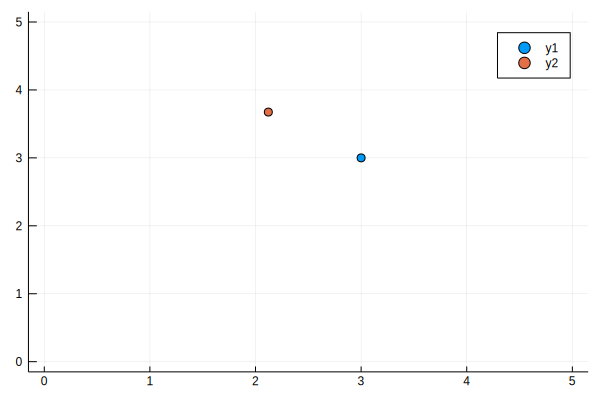

In [7]:
ang = pi/12
R = [cos(ang) -sin(ang)
    ;sin(ang) cos(ang)]
vtest = [3,3]
vtestr= R*vtest
scatter([vtest[1]],[vtest[2]],xlims=[0,5],ylims=[0,5])
scatter!([vtestr[1]],[vtestr[2]],xlims=[0,5],ylims=[0,5])

In [8]:
function CauchyAdapted(x0,y0,N)
#     ang = rand(Uniform(0,pi/6))
#     R = [cos(ang) -sin(ang)
#         ;sin(ang) cos(ang)]
    xk = zeros(N)
    yk = zeros(N)
    xk[1] = x0
    yk[1] = y0

    for k = 1:N-1
        ang = rand(Uniform(0,pi/6))
        R = [cos(ang) -sin(ang)
        ;sin(ang) cos(ang)]
        dk = -grad(xk[k],yk[k])
        tk = -grad(xk[k],yk[k])'*dk/(dk'*D*dk)*0.5
        dktr = R*dk*tk
        xk[k+1] = xk[k] + dktr[1]
        yk[k+1] = yk[k] + dktr[2]
    end
    return hcat(xk,yk)
end

CauchyAdapted (generic function with 1 method)

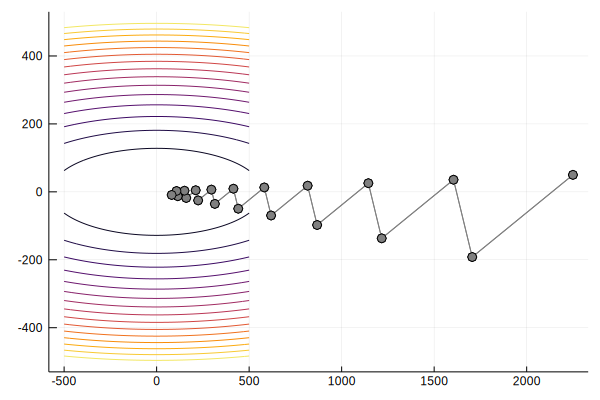

In [9]:
x0,y0 = 450,10

p_curva = contour(x, y, f, fill=false,legend=false)
z = 0
for i = 1:2
    x0,y0 = 450*5,10*5
    z  = CauchyOpt(x0,y0,20)
    p_curva = plot!(z[:,1],z[:,2],legend=false,color=:gray,marker=:o)
end
p_curva

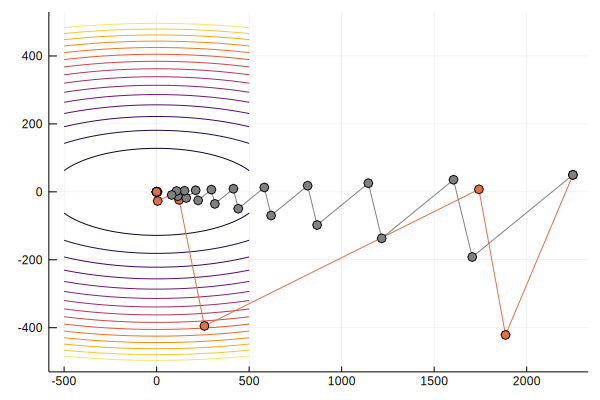

In [10]:
x0,y0 = 450,10

p_curva = contour(x, y, f, fill=false,legend=false)
z = 0
for i = 1:1
    x0,y0 = 450*5,10*5
    z  = CauchyAdapted(x0,y0,20)
    p_curva = plot!(z[:,1],z[:,2],legend=false,marker=:o)
    z  = CauchyOpt(x0,y0,20)
    p_curva = plot!(z[:,1],z[:,2],legend=false,color=:gray,marker=:o)
end
p_curva

In [11]:
p_curva = contour(x, y, f, fill=false,legend=false)
z = 0
for i = 1:100
    x0 = rand(0:500)*rand(-1:1)
    y0 = rand(0:500)*rand(-1:1)
    z  = CauchyOpt(x0,y0,10)
    p_curva = plot!(z[:,1],z[:,2],legend=false,color=:gray,marker=:o)
end

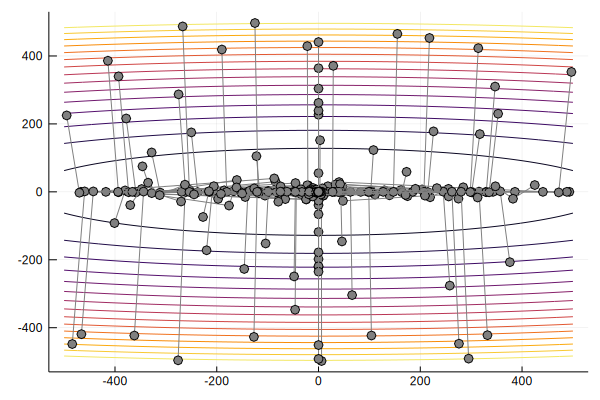

In [12]:
p_curva

In [13]:
p_x = plot(abs.(xk))
p_y = plot(abs.(yk))
z = 0
for i = 1:100
    x0 = rand(0:500)
    y0 = rand(0:500)
    z  = CauchyOpt(x0,y0,10)
    p_x = plot!(abs.(z[:,1]),legend=false)
    p_y = plot!(abs.(z[:,2]),legend=false)
end

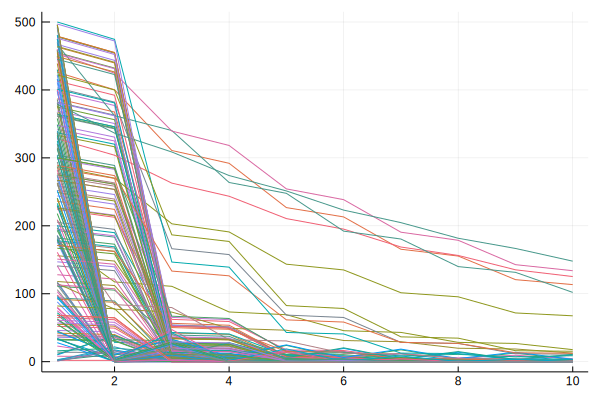

In [14]:
p_y

In [15]:
using LaTeXStrings, Measures;

In [18]:
f(x,y) = x^2 - y^2
xVals, yVals = -1:0.1:1 , -1:0.1:1

(-1.0:0.1:1.0, -1.0:0.1:1.0)

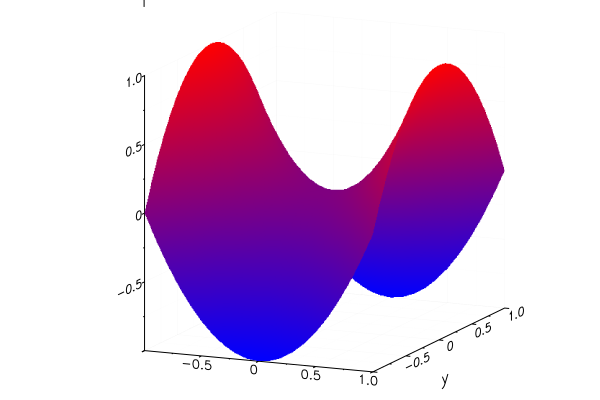

In [19]:
z = [ f(x,y) for y in yVals, x in xVals ]
p2 = surface(xVals, yVals, z, c=cgrad([:blue, :red]),legend=:none,ylabel="y", zlabel="f(x,y)",lw=2)